In [2]:
import sklearn

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('/Users/nehaalpatel/Documents/Machine_Learning/I-creating-machine-learning-models/datasets/boston_data.csv', index_col=0)

df.head()

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
ID,,,,,,,,,,,
1,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
7,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [4]:
df[df.isnull().any(axis=1)].count()

indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

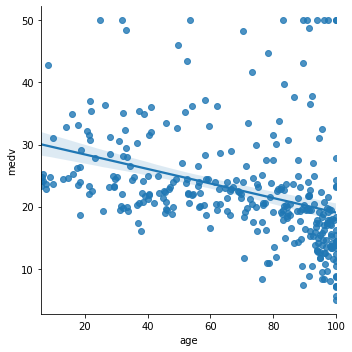

In [5]:
sns.lmplot('age', 'medv', df)

Text(10.049999999999997, 0.5, 'median value of owner-occupied homes in $1000s.')

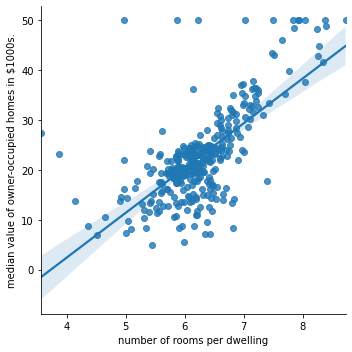

In [6]:
sns.lmplot('rm', 'medv', df)
plt.xlabel("number of rooms per dwelling")
plt.ylabel("median value of owner-occupied homes in $1000s.")

Text(10.049999999999997, 0.5, 'median value of owner-occupied homes in $100')

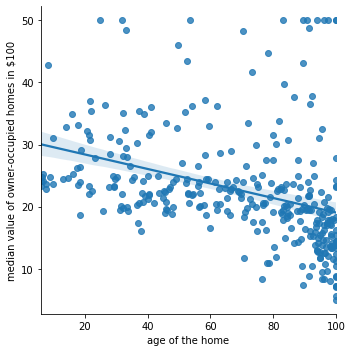

In [7]:
sns.lmplot("age", 'medv', df)
plt.xlabel("age of the home")
plt.ylabel("median value of owner-occupied homes in $100")

In [8]:
corr = df.corr()

corr

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
indus,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,0.614155,-0.473932
chas,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,-0.050055,0.204390
nox,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,0.598874,-0.413054
rm,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,-0.615747,0.689598
age,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,0.588834,-0.358888
dis,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,-0.505939,0.249422
rad,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,0.484568,-0.352251
tax,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,1.000000,0.467437,0.544485,-0.448078
ptratio,0.391087,-0.125067,0.192513,-0.366927,0.259293,-0.231101,0.470849,0.467437,1.000000,0.374802,-0.481376
lstat,0.614155,-0.050055,0.598874,-0.615747,0.588834,-0.505939,0.484568,0.544485,0.374802,1.000000,-0.738600


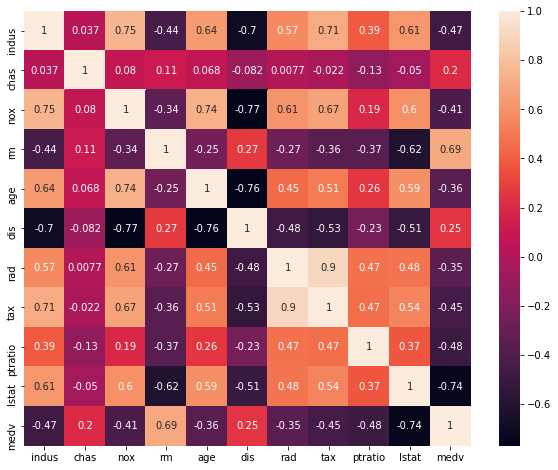

In [9]:
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True)

plt.show()

In [10]:
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df[df.isnull().any(axis=1)].count()

indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['medv'], axis=1)
Y = df['medv']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

In [14]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(activation='relu', hidden_layer_sizes=(12,6,7) , solver='lbfgs', verbose=True, max_iter=50)


In [15]:
mlp_reg.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(12, 6, 7), max_iter=50, solver='lbfgs',
             verbose=True)

In [16]:
y_pred = mlp_reg.predict(x_test)

In [17]:
from sklearn.metrics import r2_score

In [18]:
mlp_reg.score(x_train, y_train)

0.9278239582259828

In [19]:
r2_score(y_test, y_pred)

0.8136270011014762

In [20]:
df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
df_y.sample(10)

,y_test,y_pred
94,22.9,23.365774
125,50.0,47.213275
304,29.1,29.713518
220,24.2,25.355429
30,18.4,14.789068
91,24.0,26.574907
208,8.7,7.400727
63,9.5,9.785300
99,22.6,24.108393
221,11.8,8.734086


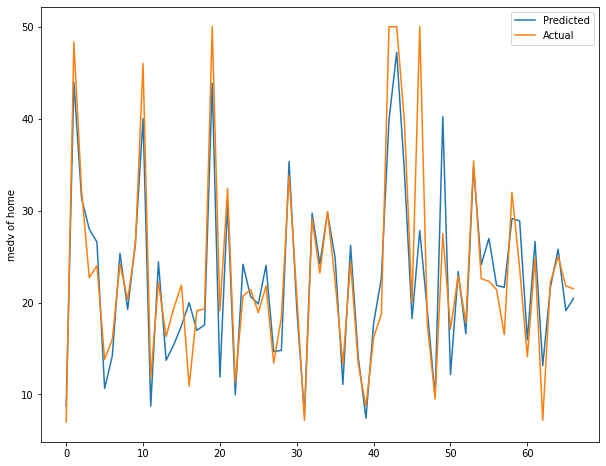

In [21]:
plt.figure(figsize=(10, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel("medv of home")
plt.legend()
plt.show()